# Applied Statistics Problems

This notebook covers the problems set as part of the assessment for the Applied Statistics module at ATU.

## Problem 1: Extending the Lady Tasting Tea

> Let's extend the Lady Tasting Tea experiment as follows. The original experiment has 8 cups: 4 tea-first and 4 milk-first. Suppose we prepare 12 cups: 8 tea-first and 4 milk-first. A participant claims they can tell which was poured first.

> Simulate this experiment using `numpy` by randomly shuffling the cups many times and calculating the probability of the participant correctly identifying all cups by chance. Compare your result with the original 8-cup experiment.

> In your notebook, explain your simulation process clearly, report and interpret the estimated probability, and discuss whether, based on this probability, you would consider extending or relaxing the p-value threshold compared to the original design.

In this section I will be extending the Lady Tasting Tea experiment to determine whether I would consider extending or relaxing the p-value threshold compared to the original design.

I will do this by creating a new experiment using 12 cups: 8 that had the tea added first and 4 with the milk added first. Then I will simulate an experiment using `numpy` by randomly shuffling the cups many times and calculating the probability of the participant identifying all cups by chance and comparing my result with the original 8-cup experiment.

First we begin by importing the required modules to complete all the problems set in this assignment. 

In [1]:
# Importing the math module to use mathematical functions.
# https://docs.python.org/3/library/math.html
import math

# Importing itertools for advanced iteration functions.
# https://docs.python.org/3/library/itertools.html
import itertools

# Importing random for generating random numbers.
# https://docs.python.org/3/library/random.html
import random

# Importing numpy for numerical operations.
# https://numpy.org/doc/stable/
import numpy as np

# Importing pandas for data manipulation and analysis.
# https://pandas.pydata.org/docs/
import pandas as pd

# Importing matplotlib for plotting and visualization.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

# Importing SciPy for scientific computing.
# https://docs.scipy.org/doc/scipy/
import scipy.stats as stats

Then we declare how many cups of tea are in the experiment and how many of those cups of tea were made by adding the tea first or the milk first.

In [2]:
# Defining variables for the number of cups of tea and milk.
num_cups = 12
num_cups_tea_first = 8
num_cups_milk_first = 4

Then using the imported math module, we can calculate how many permutations there are of grouping the 12 cups of tea into 4 and 8.

In [3]:
# Calculating the number of ways to choose 4 items from 12 items without regard to the order of selection.
# https://docs.python.org/3/library/math.html#math.comb
math.comb(num_cups, num_cups_milk_first)

495

From this we can see that there are 495 ways we can group 4 of 12.

In [4]:
# Calculating the number of ways to choose 8 items from 12 items without regard to the order of selection.
math.comb(num_cups, num_cups_tea_first)

495

As we can see, choosing 8 from 12 has the same number of permutation as choosing 4. This means that there are exactly 495 ways of grouping the 12 cups of tea into two groups of 8 and 4.

This can be found using [combinations](https://en.wikipedia.org/wiki/Combination) using the formula ${\displaystyle {\binom {n}{k}}={\frac {n(n-1)\dotsb (n-k+1)}{k(k-1)\dotsb 1}}}$ or $ {\displaystyle \textstyle {\frac {n!}{k!(n-k)!}}}$ where $n$ is the number of cups in the experiment and $k$ is the number we would like to choose.

In [5]:
# Assigning variables for clarity.
n = num_cups
k = num_cups_milk_first

# Calculating the number of ways to choose 4 items from 8 items using factorials.
# https://docs.python.org/3/library/math.html#math.factorial
no_of_ways_to_choose_4_from_8 = math.factorial(n) // (math.factorial(k) * math.factorial(n - k))

# Displaying the result.
no_of_ways_to_choose_4_from_8

495

We can make a list of the numbered cups as such:

In [6]:
# We can then create a list of all cups numbered from 0 to 11.
cups = list(range(num_cups))

# Displaying the list.
cups

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

We can then create a list of all combinations of 4 cups from a population of 12 cups.

In [7]:
# We can then create a list of all combinations of 4 cups from a population of 12 cups.
combinations_of_4_cups = list(itertools.combinations(cups, num_cups_milk_first))

# Uncomment this line to print the list of combinations.
# combinations_of_4_cups

As we can see, the list has 495 items, the number we calculated earlier.

In [8]:
# Displaying the number of combinations of 4 cups from 12 cups.
len(combinations_of_4_cups)

495

We can then decide at random to make the tea in chosen cups with the milk first.

In [9]:
# Randomly sampling 4 cups from the list of 12 cups.
labels_milk = random.sample(cups, 4)

# Sorting the list for easier comparison.
labels_milk.sort()

labels_milk

[0, 2, 6, 11]

We can now compare this to our list of all combinations and see where there is overlap.

In [10]:
# Creating an empty list to store the number of overlaps for each combination.
num_overlaps = []

# Comparing each combination with the labels_milk to find overlaps.
for combination in combinations_of_4_cups:
    s1 = set(combination)
    s2 = set(labels_milk)
    # Finding the intersection (overlap) between the two sets.
    overlap = s1.intersection(s2)
    # Uncomment the following lines to print each combination and its overlap with labels_milk.
    # print(f"Combination: {combination}, \t Overlap with labels_milk: {overlap},\t Number of overlaps: {len(overlap)}")
    # Appending the number of overlaps to the list.
    num_overlaps.append(len(overlap))


We can now create a summary table totalling the number of overlaps and displaying their counts.

In [11]:
# Calculating the unique number of overlaps and their counts.
overlaps = np.unique(num_overlaps, return_counts=True)
# Creating a DataFrame to display the results in a tabular format.
df = pd.DataFrame(list(zip(overlaps[0], overlaps[1])), 
                  columns=['Number of Overlaps', 'Count']
                  ).set_index('Number of Overlaps')
# Displaying the DataFrame.
df

,Count
Number of Overlaps,
0,70
1,224
2,168
3,32
4,1


Let's plot this as a bar chart.

<Axes: title={'center': 'Distribution of Overlaps between Choice Combinations and Selection'}, xlabel='Number of Overlaps', ylabel='Count'>

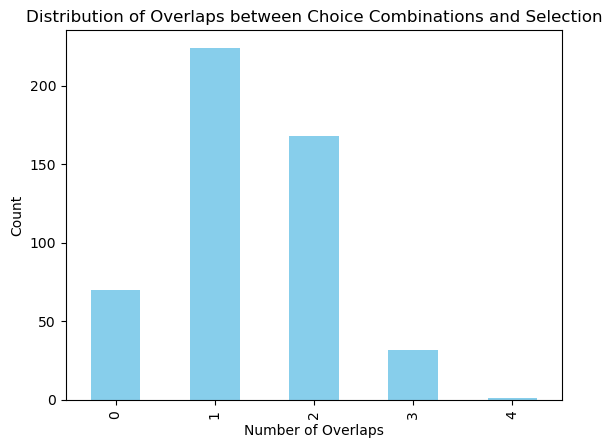

In [12]:
# Plotting the distribution of overlaps as a bar chart.
df.plot(kind='bar', legend=False, xlabel='Number of Overlaps', ylabel='Count',
        title='Distribution of Overlaps between Choice Combinations and Selection',
        color='skyblue')

We can now divide the count of the number of overlaps by the total observations to get a percentage probability.

In [13]:
# Calculating probabilities of each number of overlaps.
# Total number of combinations
total = sum(overlaps[1])
# Calculating probabilities by dividing counts by total combinations
probabilities = (overlaps[1] / total)
# Creating the DataFrame to display probabilities.
probabilities_df = pd.DataFrame(list(zip(overlaps[0], probabilities)),
                                 columns=['Number of Overlaps', 'Probability']
                                 ).set_index('Number of Overlaps')
# Displaying the probabilities DataFrame.
probabilities_df

,Probability
Number of Overlaps,
0,0.141414
1,0.452525
2,0.339394
3,0.064646
4,0.002020


Let's plot this as a pie chart.

<Axes: title={'center': 'Probability Distribution of Overlaps between Choice Combinations and Selection'}, ylabel='Probability'>

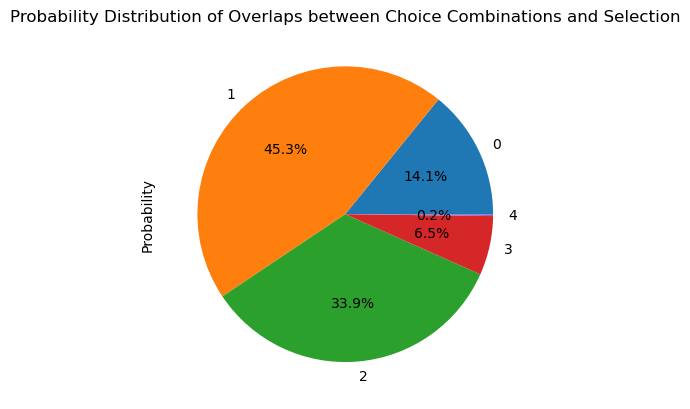

In [14]:
# Plotting the probability distribution as a pie chart.
probabilities_df.plot(kind='pie', y='Probability', legend=False, autopct='%1.1f%%',
                      title='Probability Distribution of Overlaps between Choice' \
                      ' Combinations and Selection')

If we were to compare this experiment to the original experiment of 4 in 8 correct choices we can also run the numbers for the original experiment. We can reuse the code from above.

<Axes: title={'center': 'Probability Distribution of Overlaps between Choice Combinations and Selection (Original Experiment)'}, ylabel='Count'>

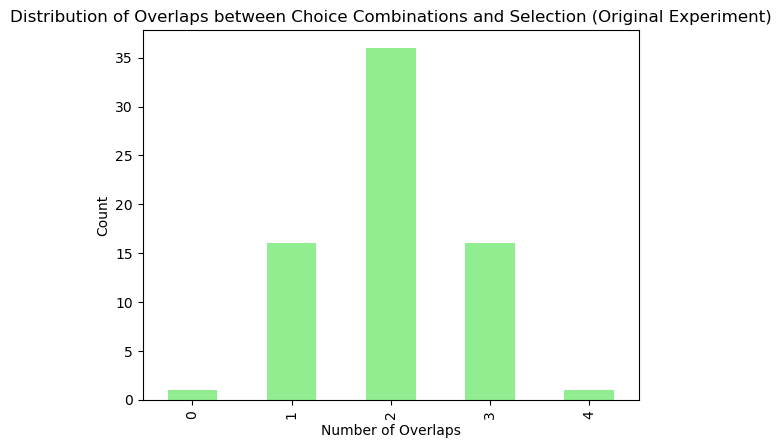

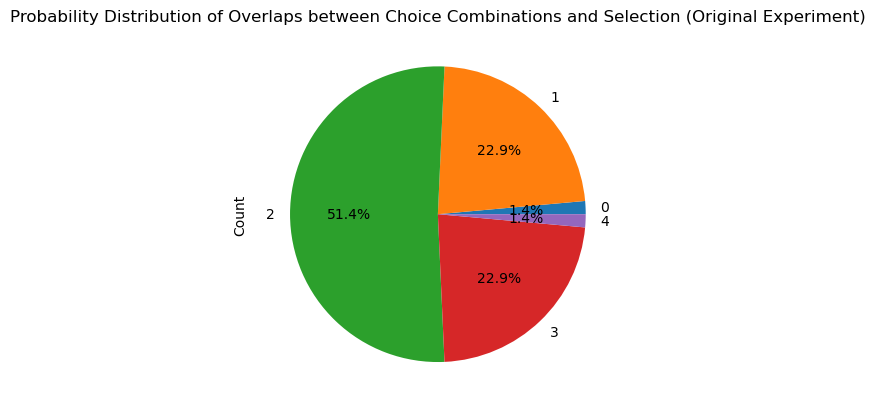

In [15]:
num_cups_original = 8
num_cups_milk_first_original = 4
combinations_of_4_cups_original = list(itertools.combinations(range(num_cups_original),
                                                              num_cups_milk_first_original))
total_original = len(combinations_of_4_cups_original)
num_overlaps_original = []
labels_milk_original = random.sample(range(num_cups_original), num_cups_milk_first_original)
labels_milk_original.sort()
for combination in combinations_of_4_cups_original:
    s1 = set(combination)
    s2 = set(labels_milk_original)
    overlap = s1.intersection(s2)
    num_overlaps_original.append(len(overlap))

total_original = len(combinations_of_4_cups_original)
combinations_original = np.unique(num_overlaps_original, return_counts=True)
df_original = pd.DataFrame(list(zip(combinations_original[0], combinations_original[1])),
                            columns=['Number of Overlaps', 'Count']
                            ).set_index('Number of Overlaps')
df_original.plot(kind='bar', legend=False, xlabel='Number of Overlaps', 
                 ylabel='Count', title='Distribution of Overlaps between ' \
                 'Choice Combinations and Selection (Original Experiment)', 
                 color='lightgreen')
df_original.plot(kind='pie', y='Count', legend=False, autopct='%1.1f%%',
                  title='Probability Distribution of Overlaps between' \
                  ' Choice Combinations and Selection (Original Experiment)')


Null Hypothesis:

* The lady is selecting the cups of tea at random.
* The lady has no special power to distinguish cups of tea made with milk first or tea first.

Alternative Hypothesis:

* The lady is able to distinguish between the cups made with milk first and the cups made with tea first.

With a $p$ value, the probability of the lady selecting all 4 cups made with milk first, of $0.002$, it is seemingly very unlikely that the correct 4 cups are chosen at random. Even if at least 3 cups were correctly chosen, it may be fair to say there is some evidence in favour of the alternative hypothesis. It would be expected that at least 1 cup is chosen.

In the original experiment, there were only 8 cups to choose from, so the probability of selecting 4 correct cups from 8 was $1/70$ or $0.014$. In this experiment the $p$ value is $0.002$, which is much smaller. Therefore I would consider extending and not relaxing the p value threshold for this experiment.

## Problem 2: Normal Distribution

> Generate 100,000 samples of size 10 from the standard normal distribution. For each sample, compute the standard deviation with `ddof=1` (sample SD) and with `ddof=0` (population SD). Plot histograms of both sets of values on the same axes with transparency. Describe the differences you see. Explain how you expect these differences to change if the sample size is increased.

### Normal distribution

The normal distribution resembles a bell when plotted on a graph. It is centred around a mean $\mu$ and has variance $\sigma^2$. It has the probability density function:

${\displaystyle f(x)={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}\,}$

From [Wikipedia](https://en.wikipedia.org/wiki/Normal_distribution).


In [16]:
# Defining a function for the probability density function of a normal distribution.
def f(x, mu=0, sigma=1):
    # Probability density function of a normal distribution
    coefficient = 1 / (sigma * np.sqrt(2 * np.pi))
    exponent = np.exp(-0.5 * ((x - mu) / sigma) ** 2)
    return coefficient * exponent

The probability density function calculates the probability of continuous random variable falling between a set of values. Any one value has a probability of 0, so we need to look at a range of values.

We can plot the probability density function with a mean of 0 and a standard deviation of 1 on a graph as follows.

Text(0.5, 1.0, 'Normal Distribution')

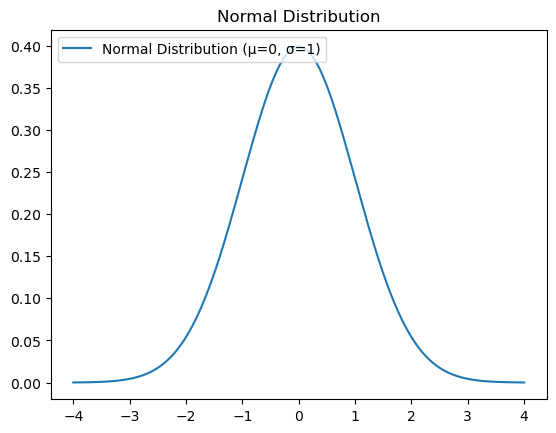

In [17]:
# Creating an array of 1001 x values from -4 to 4.
x = np.linspace(-4, 4, 1001)
# Calculating the corresponding y values using the probability density function.
y = f(x)

# Plotting the normal distribution.
plt.plot(x, y, label='Normal Distribution (μ=0, σ=1)')
plt.legend(loc='upper left')
plt.title('Normal Distribution')

An interesting feature of randomly sampling a distribution is that, according to the [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem), under certain conditions like the sample size being large enough, the samples converge upon a normal distribution. This can be demonstrated by flipping a hundred coins a million times as in the next example.

The samples are taken from a binomial distribution but if the sample size is large enough it will appear normally distributed.

In [18]:
# Generating 1,000,000 samples from a binomial distribution with n=100 and p=0.5.
n = 100
p = 0.5
k = 1000 * n

# Simulating the binomial distribution.
flips = np.random.binomial(n, p, k)

# Calculating the unique values and their counts in the flips array.
uniques, counts = np.unique(flips, return_counts=True)

# Printing the unique values and their counts.
uniques, counts

(array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
        47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
        64, 65, 66, 67, 68, 69, 70, 71, 72], dtype=int32),
 array([   3,    8,    2,   14,   47,   80,  149,  274,  452,  694, 1089,
        1617, 2246, 3009, 3771, 4764, 5878, 6682, 7373, 7634, 7903, 7935,
        7441, 6692, 5813, 4875, 3868, 3039, 2212, 1572, 1067,  703,  488,
         277,  164,   88,   41,   20,    8,    5,    1,    1,    1]))

We can plot the results as a bar chart.

Text(0, 0.5, 'Count')

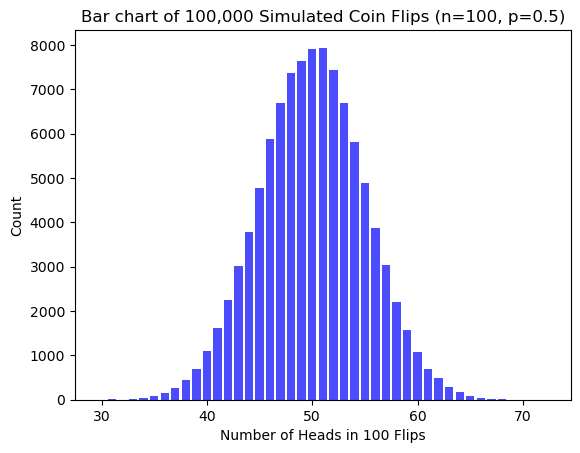

In [19]:
# Plotting the bar chart of the simulated coin flips.
plt.bar(uniques, counts, alpha=0.7, color='blue', label='Histogram of Simulated Coin Flips')
# adding title
plt.title('Bar chart of 100,000 Simulated Coin Flips (n=100, p=0.5)')
# adding x label
plt.xlabel('Number of Heads in 100 Flips')
# adding y label
plt.ylabel('Count')

If we take the mean and the standard deviation of the generated samples we can plot a bell curve that represents our data. This should mirror our results.

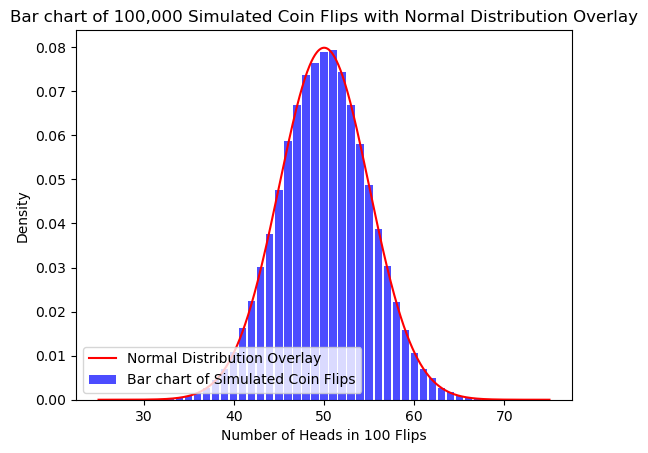

In [20]:
# Calculating mean and standard deviation of the flips.
mean_flips = np.mean(flips)
std_flips = np.std(flips)

# Creating x values for the normal distribution overlay.
x = np.linspace(25, 75, 1001)
# Calculating the corresponding y values using the probability density function.
y = f(x, mu=mean_flips, sigma=std_flips)

# Plotting a bar chart with normal distribution overlay.
# Using density normalization for the bar chart.
plt.bar(uniques, counts/k, alpha=0.7, color='blue', label='Bar chart of Simulated Coin Flips')
# Adding a line for the normal distribution overlay.
plt.plot(x, y, color='red', label='Normal Distribution Overlay')
# Adding title and labels
plt.title('Bar chart of 100,000 Simulated Coin Flips with Normal Distribution Overlay')
plt.xlabel('Number of Heads in 100 Flips')
plt.ylabel('Density')
# Adding legend at the lower left corner
plt.legend(loc='lower left')
# Displaying the plot
plt.show()
# Closing the plot
plt.close()

The [De Moivre-Laplace Theorem](https://en.wikipedia.org/wiki/De_Moivre%E2%80%93Laplace_theorem) states that the normal distribution can be used to approximate the binomial distribution. The mean and standard deviation can also be calculated using this theorem as $\mu = np$ and $\sigma = {\sqrt {np(1-p)}}$. We can use $n$ and $p$ from earlier to approximate our mean and standard deviation for this experiment and plot a probability density function using the approximated $\mu$ and $\sigma$.

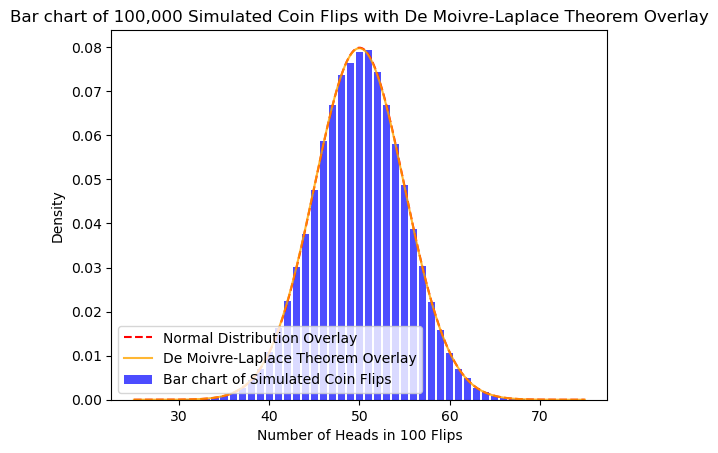

In [21]:
# Calculating mean and standard deviation using De Moivre-Laplace theorem.
mu_aprox = n * p
sigma_aprox = math.sqrt(n * p * (1 - p))

# Calculating the corresponding y values using the probability density function.
y_aprox = f(x, mu=mu_aprox, sigma=sigma_aprox)

# Plotting a bar chart with De Moivre-Laplace theorem overlay.
plt.bar(uniques, counts/k, alpha=0.7, color='blue', label='Bar chart of Simulated Coin Flips')
# Adding a dashed line for the normal distribution overlay.
# I used this reference to plot a dashed line.
# https://www.geeksforgeeks.org/python/how-to-plot-a-dashed-line-in-matplotlib/
plt.plot(x, y, color='red', label='Normal Distribution Overlay', linestyle='dashed')
# Adding the De Moivre-Laplace theorem overlay.
plt.plot(x, y_aprox, color='orange', label='De Moivre-Laplace Theorem Overlay', alpha=0.8)
# Adding title and labels
plt.title('Bar chart of 100,000 Simulated Coin Flips with De Moivre-Laplace Theorem Overlay')
plt.xlabel('Number of Heads in 100 Flips')
plt.ylabel('Density')
# Adding legend at the lower left corner
plt.legend(loc='lower left')
# Displaying the plot
plt.show()
# Closing the plot
plt.close()

As we can see by this graph, the probability density function produced by both methods are exactly the same.

For this problem, we first create the samples of size 10 from the [normal distribution](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) and take the standard deviation of each sample. The sample standard deviation is taken with 1 degree of freedom and the population standard deviation is taken with 0 degrees of freedom.

The degree of freedom are, according to [Wikipedia](https://en.wikipedia.org/wiki/Degrees_of_freedom_(statistics)), the number of values in the final calculation of the statistic that are free to vary. For the sample we have degrees of freedom 1 and for the population we have degrees of freedom 0.

In [22]:
# Generating a 100,000 x 10 array of random numbers from a normal distribution.
data = np.random.normal(size=(100000,10))

# Calculating sample and population standard deviations for each row.
stds_sample = data.std(axis=1, ddof=1)
stds_population = data.std(axis=1, ddof=0)

We can look at the shape of the first element in data and see that it is 10 elements long in one dimension.

In [23]:
# https://numpy.org/doc/stable/reference/generated/numpy.shape.html
data[0,:].shape

(10,)

The overall shape is 100,000 instances of 10 element-long arrays.

In [24]:
# Displaying the shape of the data array.
data.shape

(100000, 10)

Taking the standard deviations of these values along axis 1 returns 100,000 values, the standard deviations of the 10 element-long arrays, which is what we are looking for.

In [25]:
# Displaying the shape of the sample standard deviations array.
stds_sample.shape

(100000,)

Then on one axis we can plot the distributions overlapping and transparent.

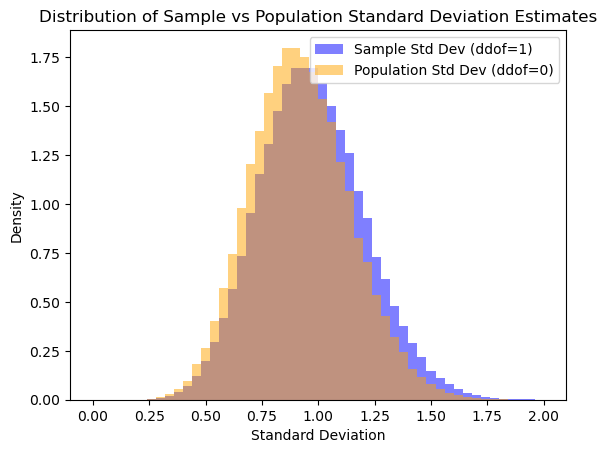

In [26]:
# Plotting the distributions of sample and population standard deviations.
# creating the plot
fig, ax = plt.subplots()
# plotting the histograms for sample and population standard deviations
ax.hist(stds_sample, bins=np.linspace(0, 2, 51), alpha=0.5,
        label='Sample Std Dev (ddof=1)', color='blue', density=True)
ax.hist(stds_population, bins=np.linspace(0, 2, 51), alpha=0.5,
        label='Population Std Dev (ddof=0)', color='orange', density=True)
# setting title and labels
ax.set_title('Distribution of Sample vs Population Standard Deviation Estimates')
ax.set_xlabel('Standard Deviation')
ax.set_ylabel('Density')
# Adding legend
ax.legend()
# Displaying the plot
plt.show()
# Closing the plot
plt.close()

[This Medium article](https://medium.com/@gawainchin/understanding-density-in-histograms-why-values-can-exceed-1-10d8ce8721cf) explains why we can have a density greater than 1. As the bins in a histogram get smaller the density can exceed 1 where the width of the bin is less than one. Here our bins are very small with many data points resulting in a density greater than 1. The area under the curve is still 1, but the data is highly concentrated around the mean resulting in a high density value.

In this figure we can see that the standard deviations of the normally distributed data is normally 
distributed. This can be explained by the Central Limit Theorem we saw earlier.

Both the sample standard deviations and the population standard deviations are similarly distributed. However, the mean of the standard deviations of the population is slightly less than that of the mean of the standard deviations of the sample. It is also taller meaning it has a lower standard deviation.

In [27]:
# Calculating and printing the means and standard deviations of the standard deviation estimates.
print(f"""Mean of Sample Standard Deviations: {stds_sample.mean():.2f}
Mean of Population Standard Deviations: {stds_population.mean():.2f}
Standard Deviation of Sample Standard Deviations: {stds_sample.std(ddof=1):.2f}
Standard Deviation of Population Standard Deviations: {stds_population.std(ddof=1):.2f}
""")

Mean of Sample Standard Deviations: 0.97
Mean of Population Standard Deviations: 0.92
Standard Deviation of Sample Standard Deviations: 0.23
Standard Deviation of Population Standard Deviations: 0.22



From [this statology article](https://www.statology.org/sample-variance-vs-population-variance/) we can see that sample variance $s^2$  can be calculated as follows:

${\displaystyle s^{2}={\frac {n}{n-1}}{\hat {\sigma }}^{2}={\frac {1}{n-1}}\sum _{i=1}^{n}(x_{i}-{\overline {x}})^{2}.}$

The population variance ${\sigma }^{2}$ can be calculated as follows:

${\displaystyle {{\sigma }}^{2}={\frac {1}{n}}\sum _{i=1}^{n}(x_{i}-{\overline {x}})^{2}.}$

$n$ in this case, our sample size, was 10. This means the sample standard deviations were slightly larger than the population standard deviations for the same sample. The difference between $n$ and $n-1$ in this case would be $10\%$ leading to a significant difference between the sample and population standard deviation of the standard deviations.

This in turn affects the standard deviation since the $\bar x$ has now changed. The standard deviation of the population standard deviations will be smaller because the mean of the standard deviations has been affected by the degrees of freedom. Using $n-1$ instead of $n$ means the mean of the standard deviations is slightly larger than the true mean of the sample. This will result in a higher standard deviation for the sample standard deviations.

As $n$ increases, the difference between $n$ and $n-1$ would become smaller. This would mean that the the standard deviations of the sample and the population would become more and more similar as $n$ increases. Running this experiment again with larger sample sizes would result in two plots that would overlap even more as the means and standard deviations of the sample and population standard deviations would be closer together.

## Problem 3: t-Tests

> A type II error occurs when a test fails to reject the null hypothesis even though it is false. For each mean difference d = 0, 0.1, 0.2, … , 1.0, repeat the following simulation 1,000 times:

> 1. Draw two samples of size 100, one from the standard normal distribution and one from the normal distribution with mean d and standard deviation 1.
> 2. Run an independent samples t-test on the two samples, rejecting the null hypothesis if the p-value is less than 0.05.
> 3. Record the proportion of times the null hypothesis is not rejected.

> Plot this proportion against d, and explain how the type II error rate changes as the difference in means increases.

The Student's, or independent samples, t-test is, according to the [scipy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html), a test for the null hypothesis that 2 independent samples have the identical average (expected) values and assumes the populations have identical variances.

According to this [towards data science article](https://towardsdatascience.com/evaluating-the-performance-of-the-t-test-1c2a4895020c/) it also holds these assumptions about the data:

1. The data is continuous.
2. The data follows the normal distribution.
3. The two samples are independent.
4. The two samples are simple random samples from their respective population.
5. The variances of the two samples are equal. The Student's t-test assumes equal variance, the Welch t-test does not assume equal variance.

From the same article we get the following equation:

$\displaystyle t = \frac{\mu_1-\mu_2}{s_p\ast \sqrt{\frac{1}{n_1}}+\frac{1}{n_2}}$

Where

$\displaystyle s_p = \sqrt{\frac{(n_1-1)s^2_1+(n_2-1)s^2_2}{n_1+n_2-2}}$

With degrees of freedom

$\displaystyle n_1+n_2-2$

We can synthesise data to demonstrate this point.

For ease of reproducibility I have set the seed for the random generator at 42 for these samples. This means that every time this block of code is run, the random numbers generated will always be the same and the analysis will easily reproduced.

In [ ]:
# Setting a random seed for reproducibility.
np.random.seed(42)
# Generating two groups of data from normal distributions with different means.
group_a = np.random.normal(loc=50, scale=10, size=30)
group_b = np.random.normal(loc=55, scale=10, size=30)

# Calculating means of each group.
mu1 = group_a.mean()
mu2 = group_b.mean()
sd1 = group_a.std(ddof=1)
sd2 = group_b.std(ddof=1)

# Calculating pooled standard deviation.
sp = np.sqrt(
    ((len(group_a) - 1) * sd1**2 + (len(group_b) - 1) * sd2**2) 
    / (len(group_a) + len(group_b) - 2)
    )

# Calculating margin of error for 95% confidence interval using the t-distribution.
t = (mu1 - mu2) / (sp * np.sqrt(1/len(group_a) + 1/len(group_b)))
df = len(group_a) + len(group_b) - 2

print(f"t-statistic: {t}, degrees of freedom: {df}")

t-statistic: 25.368220453268506, degrees of freedom: 58


From [a t-table](https://www.ttable.org/) we can calculate that the critical value for 58 degrees of freedom and a significance level of 0.05 is 2.0017. According to this [geeks for geeks page](https://www.geeksforgeeks.org/python/how-to-find-the-t-critical-value-in-python/) we can calculate this in python using `scipy.stats.t.ppf` and plugging in one minus half of alpha as the distribution is symmetrical, i.e. it is a two tailed test. 

In [ ]:
# Calculating critical value for two-tailed test at alpha = 0.05
alpha = 0.05
critical_value = stats.t.ppf(1 - alpha/2, df)
print(f"Critical value for alpha={alpha}: {critical_value}")

# Testing the hypothesis
if t > stats.t.ppf(1 - alpha/2, df) or t < stats.t.ppf(alpha/2, df):
    print("Reject the null hypothesis: The means are significantly different.")
else:
    print("Fail to reject the null hypothesis: The means are not significantly different.")

Critical value for alpha=0.05: 2.0017174841452356
Reject the null hypothesis: The means are significantly different.


As we can see, because the t-statistic is higher than the critical value for our chosen alpha we reject the null hypothesis because the means are significantly different. 

Now on to the problem. Firstly, we will synthesise data, drawing two samples of size 100, one from the standard normal distribution and one from the normal distribution with mean d and standard deviation 1, then run and independent samples t-test on the two samples, rejecting the null hypothesis if the p-value is less than 0.05. We will do this 1000 times and record the values for each iteration of the test.

In [30]:
# Initializing parameters for the simulation.
# We will vary the mean difference (d) from 0 to 1 in increments of 0.1
# https://numpy.org/doc/stable/reference/generated/numpy.linspace.html

# Creating arrays for means (d) and sample sizes (n).
d_array = np.linspace(0, 1, 11)
n_array = np.linspace(0, 10, 11)

# Initializing an array to store the p-values from the independent samples t-test.
data_3 = np.zeros((100, 2))
results = np.zeros((1000, 11))

# Setting a random seed for reproducibility.
np.random.seed(678)

# Running simulations 1000 times.
for i in range(1000):
    # Iterating over each combination of mean (d) and storing in column (n).
    for d, n in zip(d_array, n_array):
        # Generating two samples from normal distributions 
        # with specified means and standard deviations.
        data_3[:, 0] = np.random.normal(size=(1, 100))
        data_3[:, 1] = np.random.normal(size=(1, 100), loc=d)
        # Storing the p-value from the independent samples t-test in the results array
        # indexed by the current simulation number (i) and group number (n), relating to 
        # the mean of the second sample (d).
        results[i, int(n)] = stats.ttest_ind(data_3[:,0], data_3[:,1])[1]

Next we are trying to find the proportion of the p values that are greater than 0.05. Here we can isolate the values in the array that are greater than 0.05, count them and divide them by the total number of results. We can get this number by multiplying the first and second numbers of `.shape` giving us the total number of results.

In [31]:
# https://www.geeksforgeeks.org/python/how-to-get-two-decimal-places-in-python/
# Dividing the number of p-values less than 0.05 by the total number of p-values
proportion = round((results[results > 0.05].shape[0]/(results.shape[0]*results.shape[1])), 2)

# Printing the proportion to 2 decimal places.
print(f"The proportion of p-values greater than 0.05 to 2 decimal places is: {proportion}.")

The proportion of p-values greater than 0.05 to 2 decimal places is: 0.29.


Next, in order to visualise the proportion of hypotheses not rejected as the mean difference increases we will initialise a list to store our values then calculate the values and store them in the list. We can then plot these on a graph against the values used to create the difference in mean in the experiment, $d$.

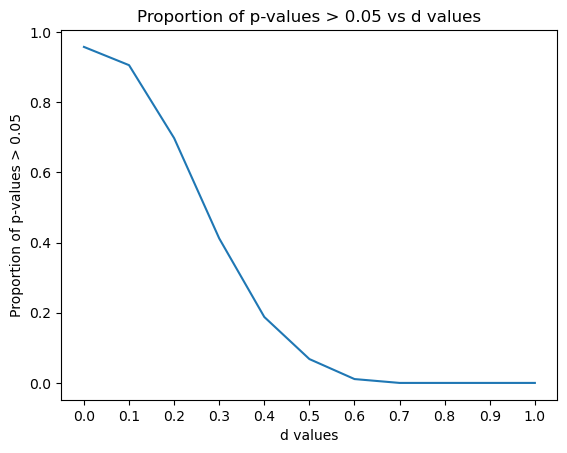

In [32]:
# Creating a list to store the proportion of p-values less than 0.05 for each d value.
d_proportion = []

# Calculating the proportion of p-values greater than 0.05 for each d value.
for i in range(11):
    d_proportion.append(results[results[:, i] > 0.05].shape[0] / results.shape[0])

# Plotting the proportion of p-values greater than 0.05 against d values.
plt.plot(d_array, d_proportion)
plt.title('Proportion of p-values > 0.05 vs d values')
plt.xlabel('d values')
plt.ylabel('Proportion of p-values > 0.05')
plt.xticks(d_array)
plt.show()

We can look at these values a little more closely to see the exact proportions.

In [33]:
# Printing the d values and their corresponding proportions to 1 and 2 decimal places respectively.
d_array_rounded = [round(val, 1) for val in d_array]
d_proportion_rounded = [round(val, 2) for val in d_proportion]
for n, d in zip(d_array_rounded, d_proportion_rounded):
    print(f"d value: {n}, Proportion of p-values > 0.05: {d}")

d value: 0.0, Proportion of p-values > 0.05: 0.96
d value: 0.1, Proportion of p-values > 0.05: 0.91
d value: 0.2, Proportion of p-values > 0.05: 0.7
d value: 0.3, Proportion of p-values > 0.05: 0.41
d value: 0.4, Proportion of p-values > 0.05: 0.19
d value: 0.5, Proportion of p-values > 0.05: 0.07
d value: 0.6, Proportion of p-values > 0.05: 0.01
d value: 0.7, Proportion of p-values > 0.05: 0.0
d value: 0.8, Proportion of p-values > 0.05: 0.0
d value: 0.9, Proportion of p-values > 0.05: 0.0
d value: 1.0, Proportion of p-values > 0.05: 0.0


From [the documentation for stats.ttest_ind](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html): 

> This is a test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

A type II error occurs when a test fails to reject the null hypothesis when it is false. We can measure the type II error in this case by the proportion of null hypothesis that are not rejected where the means are different in our graph above.

The type II error rate increases significantly as the difference in sample means increases. At $d = 0$, almost $95\%$ of the null hypotheses were not rejected - this is expected as the means are the same and about $5\%$ type I errors, rejecting the null hypothesis mistakenly, are also expected, as [this article from Towards Data Science](https://towardsdatascience.com/evaluating-the-performance-of-the-t-test-1c2a4895020c/), referenced earlier, explains:

> Size level of 0.05 is commonly used and this means that we expect that, on average, about 5% of the times the test will get a false positive due to randomness.

A false positive in this case being a a type I error, i.e. rejecting the null hypothesis when it is true, and size in this context meaning the power of the t-test. So 5% of the time we will reject the null hypothesis mistakenly due to randomness.

 From a $d$ value of $0.1$ the type II error is $91\%$ reducing steadily as $d$ increases. At a mean difference $d$ of $0.7$ the type II error rate is already almost $0\%$.

This is because the independent samples t test is looking for a difference in means. As the mean difference $d$ increases the likelihood that evidence is present to suggest that the samples are distributed differently increases and the null hypothesis that the two samples are distributed similarly, or rather as it says in the documentation that they have identical average (expected) values, is rejected, leading to a lower probability of a type II error.

## Problem 4: ANOVA

>Generate three independent samples, each of size 30, from normal distributions with means 0, 0.5, and 1, each with standard deviation 1.

> 1. Perform a one-way ANOVA to test whether all three means are equal.
> 2. Perform three independent two-sample t-tests: samples 1 vs 2, 1 vs 3, and 2 vs 3.
> 3. Compare the conclusions.

>Write a short note on why ANOVA is preferred over running several t-tests.

First we generate samples of size 30 from 3 distributions of equal variance but different means.

For ease of reproducibility I have set the seed for the random generator at 678 for these samples. This means that every time this block of code is run, the random numbers generated will always be the same and the analysis will easily reproduced.

In [34]:
# Setting a random seed for reproducibility.
np.random.seed(678)
# Generating random samples from normal distributions with different means.
group_a = np.random.normal(0, 1, 30)
group_b = np.random.normal(0.5, 1, 30)
group_c = np.random.normal(1, 1, 30)

In order to visualise how these groups are distributed, I will generate box plots of the values.

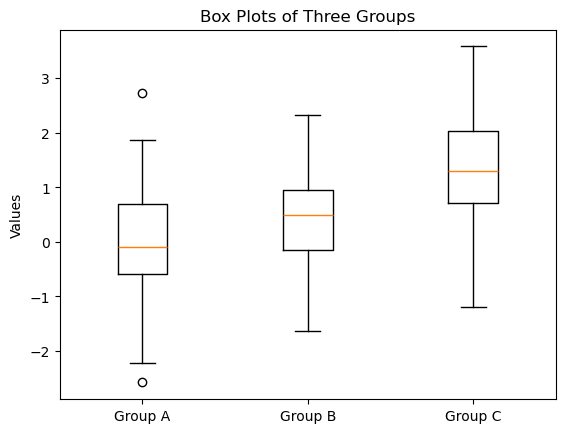

In [35]:
# Creating box plots to visualize the distributions of the three groups.
data_to_plot = [group_a, group_b, group_c]
plt.boxplot(data_to_plot, tick_labels=['Group A', 'Group B', 'Group C'])
plt.title('Box Plots of Three Groups')
plt.ylabel('Values')
plt.show()

It looks like group a and b are similarly distributed but group c seems to be significantly different to the other two groups. Let's see what the statistics say.

I will perform a one-way anova using an f test that will test the null hypothesis that the groups have the same population mean.

In [36]:
# Performing one-way ANOVA on the three groups.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html
f_statistic, p_value = stats.f_oneway(group_a, group_b, group_c)
print(f"F-statistic: {f_statistic}, p-value: {p_value}")

# Interpreting the p-value from the ANOVA test.
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: At least one group mean is significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference between group means.")

F-statistic: 12.262257763045335, p-value: 2.034592636766114e-05
Reject the null hypothesis: At least one group mean is significantly different.


The p-value is significantly less than 0.05, meaning we reject the null hypothesis, as there is no evidence to support the claim that the means are the same for all three groups.

In order to investigate this claim further we can perform Tukey's Honest Significant Difference test. This will perform pairwise group comparisons and give up p-values for each pairing of the 3 groups, 6 in total.

In [37]:
# Performing Tukey's HSD post-hoc test to identify which groups differ.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tukey_hsd.html
tukey_result = stats.tukey_hsd(group_a, group_b, group_c)
print(tukey_result)

Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.405     0.325    -1.075     0.266
 (0 - 2)     -1.356     0.000    -2.027    -0.686
 (1 - 0)      0.405     0.325    -0.266     1.075
 (1 - 2)     -0.951     0.003    -1.622    -0.281
 (2 - 0)      1.356     0.000     0.686     2.027
 (2 - 1)      0.951     0.003     0.281     1.622



For comparisons (0 - 1) and (1 - 0) we can see that it yielded a p-value of 0.325. If this was an isolated test, we would fail to reject the null hypothesis.

We can look at the individual independent t-tests for the groups.

In [38]:
# Performing independent samples t-test between Group A and Group B.
t, p = stats.ttest_ind(group_a, group_b)
print(f'T-value: {t:.2f}, P-Value: {p:.2f}')

T-value: -1.45, P-Value: 0.15


Looking at the p-value for an independent t-test for group a and b, we can see that we would fail to reject the null hypothesis that the mean of the two groups is the same.

However the p-value is significantly smaller than in the tukey test.

What about the other two groups?

In [39]:
# Performing independent samples t-test between Group A and Group B.
t, p = stats.ttest_ind(group_a, group_c)
print(f'T-value: {t:.2f}, P-Value: {p:.2f}')

T-value: -4.53, P-Value: 0.00


For group a and c we would reject the null hypothesis that the two groups have the same mean.

In [40]:
# Performing independent samples t-test between Group A and Group B.
t, p = stats.ttest_ind(group_b, group_c)
print(f'T-value: {t:.2f}, P-Value: {p:.2f}')

T-value: -3.61, P-Value: 0.00


For group b and c we would reject the null hypothesis that the two groups have the same mean.

It looks like the values for the tukey test are different.

From [this PennState lecture](https://online.stat.psu.edu/stat502/lesson/2/2.3) we can see that the probability of a type I error increases from 0.05% to 0.14%. It also provides an equation for w.

$\displaystyle w=q_{\alpha (p,df_{Error})}\cdot s_{\bar Y}$

With 29 degrees of freedom, that is one less than the sample size, and p of 3, the number of groups, we can get the $p,df_{Error}$ by looking up a [table like this from soc statistics](https://www.socscistatistics.com/pvalues/qcalculator.aspx). It turns out to be 3.49 for $Q_{.05}$. 

From [this Statistics by Jim article](https://statisticsbyjim.com/hypothesis-testing/standard-error-mean/) we learn that the standard error of the mean can be calculated this follows:

$\displaystyle s_{\bar Y} = \sqrt{MS_{Error}/n} = \sqrt{\frac{s^2}{N}} = \frac{s}{\sqrt{N}}$

In [41]:
# Calculating standard deviation
s = group_a.std(ddof=1)
# Printing the standard deviation
print(f'Standard Deviation of Group A: {s:.2f}')
# Calculating standard error
standard_error = s / math.sqrt(len(group_a))
# Printing the standard error
print(f'Standard Error of Group A: {standard_error:.2f}')
# Calculating margin of error
# Setting the q value for 95% confidence level with df=29 and p=3
q = 3.49
# Calculating margin of error
w = q * standard_error
# Printing the margin of error
print(f'Margin of Error (w): {w:.2f}')

Standard Deviation of Group A: 1.21
Standard Error of Group A: 0.22
Margin of Error (w): 0.77


The PennState lecture goes on to say, that if the difference between the group means is larger than our w, then there is a significant difference between those means.

In [42]:
# Calculating means of each group
mean1 = group_a.mean()
mean2 = group_b.mean()
mean3 = group_c.mean()

# Comparing means pairwise
m1 = abs(mean1 - mean2) 
m2 = abs(mean2 - mean3)
m3 = abs(mean1 - mean3)

# Checking if the absolute mean differences exceed the margin of error
if m1 > w:
    print("The mean of the first and second groups are significantly different.")
if m2 > w:
    print("The mean of the second and third groups are significantly different.")
if m3 > w:
    print("The mean of the first and third groups are significantly different.")

The mean of the second and third groups are significantly different.
The mean of the first and third groups are significantly different.


[This question and answer from reasearchgate.net](https://www.researchgate.net/post/What-is-the-difference-between-Tukeys-Post-Hoc-Test-and-Students-t-test/5333f7f7d4c1181a638b4584/citation/download) says the tukey test corrects for family-wise error, i.e. the more pairwise comparisons you have the higher the likelihood for a type I error. The tukey test will ensure that the error will be at most whatever the chosen alpha level. It is a t-test that takes FWE into account.

From [this bench biostats lecture](https://middleprofessor.github.io/benchbiostats/chapters/multiple-testing.html), we learn that the probability of a type I error increases from 0.05% to 0.14%, i.e. $1 - 0.95^3$ for a group of 3. This is called the familywise error rate.

In [43]:
# Calculating familywise error rate for 3 tests at alpha = 0.05
print(f"Familywise error rate for 3 tests: {1 - 0.95**3:.2f}")

Familywise error rate for 3 tests: 0.14


As we discussed in the previous problem, a type I error is a false positive, or the incorrect rejection of the null hypothesis. As we saw from the examples in the last section this is $5\%$, even when the group means are the same.

When there are multiple groups being analysed simultaneously the type I error increases proportionately to the number of groups involved. If this is not corrected for then the results of the test would become increasingly skewed with every additional group.

ANOVA avoids this error by performing one single test that determines if there is any significant difference among the group means rather than running several tests, thereby increasing the likelihood of a type I error.

The tukey test was designed to correct for multiple tests. This is why it gives different p-values than our independent t-test.

ANOVA is preferred because it corrects for the familywise error that accumulates for every additional group that is introduced to the experiment. 

## End